In [3]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Users/hi/Desktop\승엽/Himedia_project/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio



In [4]:
df = pd.read_csv("C:/Users/hi/Downloads/silicon_valley_summary.csv")
df

,job_category,race_ethnicity,gender,count,percentage
0,All workers,White,Male,268883,41.257252
1,All workers,White,Female,105560,16.197065
2,All workers,Black_or_African American,Male,17508,2.686417
3,All workers,Black_or_African American,Female,11479,1.761331
4,All workers,Asian,Male,125347,19.233171
5,All workers,Asian,Female,58049,8.907005
6,All workers,Hispanic_or_Latino,Male,32201,4.940903
7,All workers,Hispanic_or_Latino,Female,15512,2.380152
8,All workers,All,Male,454813,69.786244
9,All workers,All,Female,196910,30.213756


In [7]:
# 실리콘 밸리에서 일하는 사람들의 정보가 있습니다.

# 직업 종류, 인종, 성별 등이 포함되어 있는데요.

# 실리콘 밸리에서 일하는 남자 관리자 (Managers)에 대한 인종 분포를 막대 그래프로 다음과 같이 그려보세요.

In [23]:
df['race_ethnicity'].value_counts()

White                        8
Black_or_African American    8
Asian                        8
Hispanic_or_Latino           8
All                          8
Totals                       4
Name: race_ethnicity, dtype: int64

In [24]:
df['race_ethnicity'].value_counts().index

Index(['White', 'Black_or_African American', 'Asian', 'Hispanic_or_Latino',
       'All', 'Totals'],
      dtype='object')

In [15]:
type(df['race_ethnicity'].value_counts())

pandas.core.series.Series

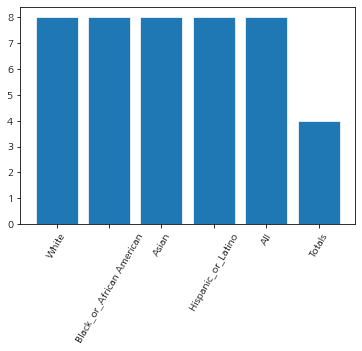

In [37]:
fig, ax = plt.subplots()
x = df['race_ethnicity'].value_counts().index
y = df['race_ethnicity'].value_counts()
ax.bar(x, y, edgecolor="white", linewidth=0.7)
plt.xticks(rotation =60)

plt.show()

In [34]:
# 어도비 전체 직원들의 직군 분포를 파이 그래프로 그려보세요.

# (인원이 0인 직군은 그래프에 표시되지 않아야 합니다.)

df1 = pd.read_csv("C:/Users/hi/Downloads/silicon_valley_details.csv")
df1

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [64]:
df1[df1['company']=='Adobe']['job_category'].value_counts()

Executives                15
Managers                  15
Professionals             15
Technicians               15
Sales workers             15
Administrative support    15
Craft workers             15
operatives                15
laborers and helpers      15
Service workers           15
Totals                    15
Previous_totals           15
Name: job_category, dtype: int64

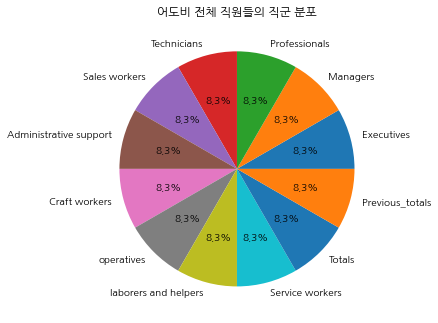

In [80]:
x = df1[df1['company']=='Adobe']['job_category'].value_counts()
labels = list(x.index)
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('어도비 전체 직원들의 직군 분포')
plt.tight_layout()


In [76]:
list(x.index)


['Executives',
 'Managers',
 'Professionals',
 'Technicians',
 'Sales workers',
 'Administrative support',
 'Craft workers',
 'operatives',
 'laborers and helpers',
 'Service workers',
 'Totals',
 'Previous_totals']

In [ ]:
# 냥냥동물병원에 고양이 20,000 마리의 몸무게 데이터가 있습니다. 고양이들의 몸무게가 어떻게 분포하고 있는지 몸무게의 범위를 나눠서 알아보려고 합니다. 어떤 시각화 방법을 사용하면 의미 있는 결과를 얻을 수 있을까요? 왜 그렇게 생각하나요?
